In [1]:
from matplotlib import pylab
from pylab import *
pylab.rcParams['figure.figsize'] = (30.0, 30.0)
import geopandas as gpd
import pandas as pd

town_shp = gpd.read_file('./mapdata/TOWN_MOI_1081121.shp', encoding='utf8')
town_shp

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."
...,...,...,...,...,...,...,...,...
363,D22,67000150,臺南市,七股區,Qigu District,D,67000,"POLYGON ((120.13989 23.19585, 120.14003 23.195..."
364,D23,67000160,臺南市,將軍區,Jiangjun District,D,67000,"POLYGON ((120.08374 23.24056, 120.08470 23.239..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.22256 24.94984, 121.22259 24.949..."
366,E02,64000020,高雄市,鼓山區,Gushan District,E,64000,"POLYGON ((120.27878 22.67380, 120.27891 22.673..."


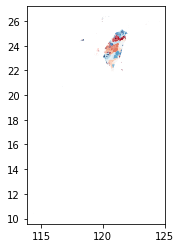

In [2]:
town_shp.plot(cmap='RdBu')

C:\Users\m6121\Anaconda3\envs\xgb\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


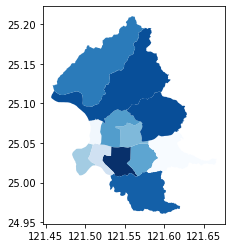

In [3]:
Taipei_shp = town_shp[town_shp['COUNTYNAME']=='臺北市']
popularity = [308686,273686,223113,189387,158903,121576,205633,127651,229309,287442,286339,255183]
np.array(popularity)
Taipei_shp['popularity'] = np.array(popularity)
Taipei_shp.plot(cmap=plt.cm.Blues, column='popularity')

In [26]:
pol_data = pd.read_excel('./data/newpolicestation.xlsx')
pol_data["Coordinates"] = list(zip(pol_data.longitude, pol_data.latitude))
pol_data["Coordinates"] = pol_data["Coordinates"].apply(Point)

gdf = gpd.GeoDataFrame(pol_data, geometry="Coordinates")
pol_data

,name,content,display_addr,latitude,longitude,Coordinates
0,臺北市政府警察局總局,臺北市政府警察局總局,臺北市中正區延平南路96號,25.043910,121.509760,POINT (121.50976 25.04391)
1,大同分局,大同分局,臺北市大同區錦西街200號,25.059370,121.515090,POINT (121.51509 25.05937)
2,萬華分局,萬華分局,臺北市萬華區康定路22號,25.045080,121.502860,POINT (121.50286 25.04508)
3,中山分局,中山分局,臺北市中山區中山北路二段1號,25.052480,121.522840,POINT (121.52284 25.05248)
4,大安分局,大安分局,臺北市大安區仁愛路三段2號,25.037870,121.533100,POINT (121.53310 25.03787)
...,...,...,...,...,...,...
108,文德派出所,隸屬內湖分局,臺北市內湖區民權東路六段26號,25.066580,121.578940,POINT (121.57894 25.06658)
109,東湖派出所,隸屬內湖分局,臺北市內湖區五分街10號,25.067460,121.612980,POINT (121.61298 25.06746)
110,康樂派出所,隸屬內湖分局,臺北市內湖區康樂街110巷16弄20號,25.070426,121.618387,POINT (121.61839 25.07043)
111,康寧派出所,隸屬內湖分局,臺北市內湖區金湖路83號,25.081230,121.597549,POINT (121.59755 25.08123)


In [27]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = Taipei_shp.to_json())

In [28]:
p = figure(title = '臺北市地價著色地圖, 2019', 
           
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
palette = brewer['Blues'][8]
color_mapper = LinearColorMapper(palette = palette, low = 80, high = 40)
# Add patch renderer to figure.
city_source = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'land_value',
                                'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)


p.circle(pol_data["latitude"], pol_data["longitude"], 
         fill_color = { 'transform' : color_mapper})

# Create hover tool
p.add_tools(HoverTool(renderers = [city_source],
                      tooltips = [('City','@TOWNNAME'),
                                ('地價','@land_value')]))
# show(p)

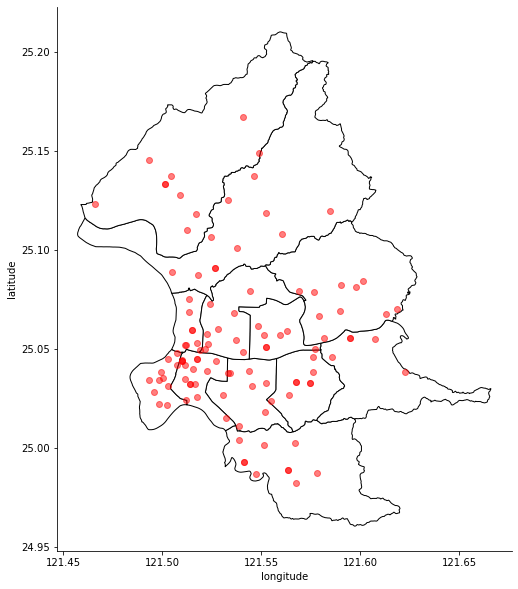

In [29]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
Taipei_shp.query("COUNTYNAME == '臺北市'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()